In [1]:
from contex_bayes_opt import ContextualBayesianOptimization, UtilityFunction
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def dummy_environment(context, action):
    return np.sum(np.abs(action - (1 - context))) / len(context) 

In [3]:
discvars = {'a1': np.linspace(0, 1, 100),
            'a2': np.linspace(0, 1, 100), }
action_dim = len(discvars)
contexts = {'c1': '', 'c2': '',}
context_dim = len(contexts)


length_scale = np.ones(context_dim+action_dim)
kernel = WhiteKernel(noise_level=1) + Matern(nu=1.5, length_scale=length_scale)
noise = 1e-6

beta_function='const'
beta_const_val=2.5


In [4]:
optimizer = ContextualBayesianOptimization(all_actions_dict=discvars, contexts=contexts, kernel=kernel)

utility = UtilityFunction(kind="ucb", beta_kind=beta_function, beta_const=beta_const_val)


/home/jeffersonva/Documents/contextual_bayesian_optimization/contex_bayes_opt/contextual_bayesian_optimization.py:32: UserWarning: Kernel hyperparameters will be computed during the optimization.
  warnings.warn('Kernel hyperparameters will be computed during the optimization.')


In [5]:
# TRAIN
nIters = 100
for i in range(nIters):
    rand_context = np.random.rand(context_dim)
    context = optimizer.array_to_context(rand_context)
    
    action = optimizer.suggest(context, utility)
    
    vContext = optimizer.context_to_array(context)
    vAction = optimizer.action_to_array(action)
    reward = - dummy_environment(vContext, vAction)

    if i%25 == 0:
        print(f'context={context}, action={action}, vContext={vContext},vAction={vAction},reward={reward}\n')
    optimizer.register(context, action, reward)

context={'c1': 0.09174612963016371, 'c2': 0.9475762229515426}, action={'a1': 0.5454545454545455, 'a2': 0.7575757575757577}, vContext=[0.09174613 0.94757622],vAction=[0.54545455 0.75757576],reward=-0.5339756527212955

context={'c1': 0.38804332723891877, 'c2': 0.903660385463399}, action={'a1': 0.6767676767676768, 'a2': 0.0}, vContext=[0.38804333 0.90366039],vAction=[0.67676768 0.        ],reward=-0.08057530927159828

context={'c1': 0.9141219593579719, 'c2': 0.10686603708976739}, action={'a1': 0.14141414141414144, 'a2': 0.8080808080808082}, vContext=[0.91412196 0.10686604],vAction=[0.14141414 0.80808081],reward=-0.0702946278007689

context={'c1': 0.630079644302969, 'c2': 0.6468924514433938}, action={'a1': 0.24242424242424243, 'a2': 0.4141414141414142}, vContext=[0.63007964 0.64689245],vAction=[0.24242424 0.41414141],reward=-0.09426498942879827



In [6]:
res = optimizer.res
vReward = []
for i in range(nIters):
    vReward.append(res[i]['reward'])

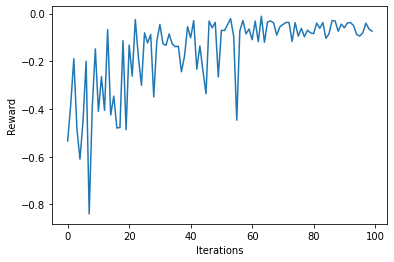

In [7]:
plt.figure()
plt.plot(vReward)
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.show()

In [8]:
!pip install gymnasium
import gymnasium as gym
env = gym.make('CartPole-v1')

Defaulting to user installation because normal site-packages is not writeable


In [9]:
discvars_cart = {'a1': np.linspace(0, 1, 2)}
action_dim_cart = len(discvars_cart)
contexts_cart = {'c1': '', 'c2': '','c3': '','c4': '',}
context_dim_cart = len(contexts_cart)


length_scale = np.ones(context_dim_cart+action_dim_cart)
kernel_cart = WhiteKernel(noise_level=1) + Matern(nu=1.5, length_scale=length_scale)

optimizer_cart = ContextualBayesianOptimization(all_actions_dict=discvars_cart, contexts=contexts_cart, kernel=kernel_cart)
utility_cart = UtilityFunction(kind="ucb", beta_kind=beta_function, beta_const=beta_const_val)

# TRAIN
nIters = 50
env_context = env.reset()[0] 
reward = 0
done = False
all_rewards = []
# print(env_context)
for i in range(nIters):
    while (done)!= True:
        # print(i)
        context = optimizer_cart.array_to_context(env_context)
        
        action = optimizer_cart.suggest(context, utility_cart)
        
        vContext = optimizer_cart.context_to_array(context)
        vAction = optimizer_cart.action_to_array(action)
        
        # print(f'{len(env.step(int(vAction[0])))}\n\n\n\n')
        context_next, reward_n, done, info, _ = env.step(int(vAction[0]))
        
        reward += reward_n
        # print(i, reward, done)
        
        optimizer_cart.register(context, action, reward)
        
        
        if done: 
            if i % 10 == 0: 
                    print(f'EPISODE = {i}, reward={reward}\n ')
            all_rewards.append(reward)
            env_context = env.reset()[0]
            reward = 0
        else:    
            env_context = context_next
    done = False

/home/jeffersonva/Documents/contextual_bayesian_optimization/contex_bayes_opt/contextual_bayesian_optimization.py:32: UserWarning: Kernel hyperparameters will be computed during the optimization.
  warnings.warn('Kernel hyperparameters will be computed during the optimization.')


EPISODE = 0, reward=13.0
 
EPISODE = 10, reward=10.0
 
EPISODE = 20, reward=10.0
 
EPISODE = 30, reward=13.0
 
EPISODE = 40, reward=9.0
 


In [10]:
# res_cart = optimizer_cart.res
# res_cart
# vReward_cart = []
# for i in range(nIters):
#     vReward_cart.append(res_cart[i]['reward'])

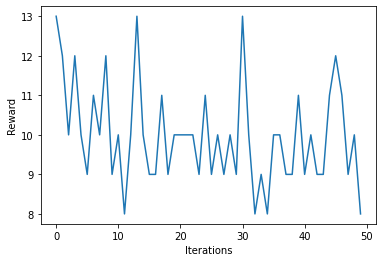

In [11]:
plt.figure()
plt.plot(all_rewards)
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.show()

In [43]:
X_test, y_test = env_context, action['a1']